# Seeds Classification

### Contents:

* [1 - Problem Formulation](#1)
* [2 - Loading the data](#2)
* [3 - Exploring Insights in Data or EDA](#3)
* [4 - Preprocessing the data](#4)
* [5 - Creating and Training](#5)
* [6 - Model Evaluation](#6)
* [7 - Evaluating the Model on the Test Set](#7)

<a name='1'></a>

## 1. Problem Formulation

Kelompok yang diperiksa terdiri dari kernel yang termasuk dalam tiga varietas gandum yang berbeda: Kama, Rosa dan Kanada, masing-masing 70 elemen, dipilih secara acak untuk percobaan.

<a name='2'></a>

## 2. Loading the Data

Here are the details of the features. It is 7 features. The target feature is `Class` and it has three classes: `0(Kama), 1(Rosa), 2(Kanada).`

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [72]:
df = pd.read_csv('seeds_dataset.txt', sep='\t+', header=None)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       210 non-null    float64
 1   1       210 non-null    float64
 2   2       210 non-null    float64
 3   3       210 non-null    float64
 4   4       210 non-null    float64
 5   5       210 non-null    float64
 6   6       210 non-null    float64
 7   7       210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [74]:
df.columns=['Area','Perimeter','Compactness','Length of kernel','Width of kernel','Asymmetry coefficient','Length of kernel groove','Class']

In [75]:
df.head()

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [76]:
df['Class'].value_counts()

1    70
2    70
3    70
Name: Class, dtype: int64

In [77]:
correlation = df.corr()
correlation['Class']

Area                      -0.346058
Perimeter                 -0.327900
Compactness               -0.531007
Length of kernel          -0.257269
Width of kernel           -0.423463
Asymmetry coefficient      0.577273
Length of kernel groove    0.024301
Class                      1.000000
Name: Class, dtype: float64

<AxesSubplot:>

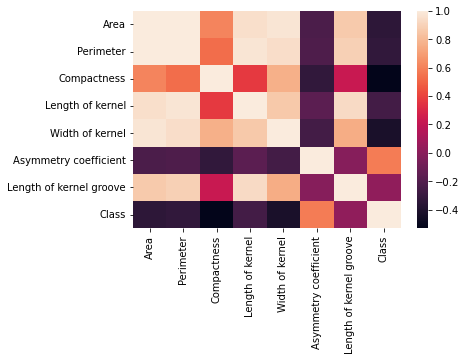

In [78]:
sns.heatmap(df.corr())

In [79]:
df1 = df.drop(columns=['Area','Perimeter','Compactness','Length of kernel','Width of kernel'])

In [80]:
df1.head()

,Asymmetry coefficient,Length of kernel groove,Class
0,2.221,5.220,1
1,1.018,4.956,1
2,2.699,4.825,1
3,2.259,4.805,1
4,1.355,5.175,1


In [81]:
from sklearn.model_selection import train_test_split

seeds_train, seeds_test = train_test_split(df1, test_size=0.2,random_state=20)

In [82]:
# Checking the number of data points/size of the data
print('The size of training data is: {} \nThe size of testing data is: {}'.format(len(seeds_train), len(seeds_test)))

The size of training data is: 168 
The size of testing data is: 42


<a name='3'></a>

## 3. Exploring Insights in Data or EDA

In [83]:
train_data = seeds_train.copy()

In [84]:
seeds_train.describe()

,Asymmetry coefficient,Length of kernel groove,Class
count,168.000000,168.000000,168.000000
mean,3.587507,5.386458,1.988095
std,1.472480,0.493802,0.833348
min,0.765100,4.519000,1.000000
25%,2.339000,5.003000,1.000000
50%,3.528500,5.219500,2.000000
75%,4.683250,5.850000,3.000000
max,8.456000,6.550000,3.000000


In [85]:
seeds_train.isna().sum()

Asymmetry coefficient      0
Length of kernel groove    0
Class                      0
dtype: int64

In [86]:
correlation = seeds_train.corr()
correlation['Class']

Asymmetry coefficient      0.554562
Length of kernel groove    0.009035
Class                      1.000000
Name: Class, dtype: float64

<AxesSubplot:>

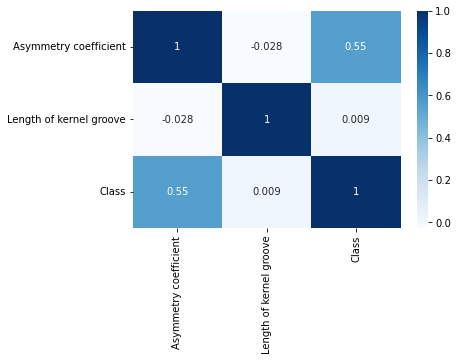

In [87]:
sns.heatmap(correlation, annot=True, cmap='Blues')

#### More Data Exploration

In [88]:
seeds_train['Class'].value_counts()

1    59
3    57
2    52
Name: Class, dtype: int64

Text(0.5, 1.0, 'Class Ranges')

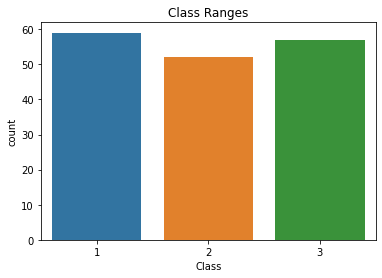

In [89]:
sns.countplot(seeds_train['Class'])
plt.title('Class Ranges')

<AxesSubplot:xlabel='Asymmetry coefficient', ylabel='Length of kernel groove'>

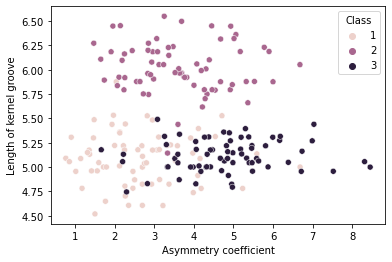

In [90]:
sns.scatterplot(data=df1, x='Asymmetry coefficient', y='Length of kernel groove', hue='Class')

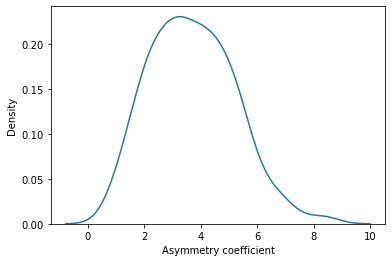

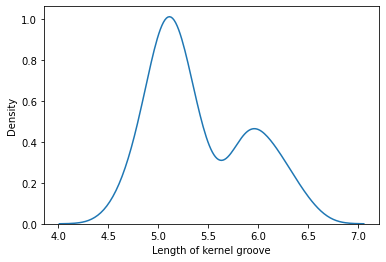

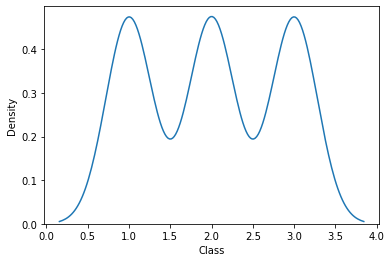

In [91]:
for i in df1.columns:
    sns.kdeplot(df1[i])
    plt.show()

<a name='4'></a>

## 4. Data Preprocessing

In [92]:
training_input_data = seeds_train.drop('Class', axis=1)
training_labels = seeds_train['Class']

In [93]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

def scale_feats(num_input_data):
    
    normalized_data = scaler.fit_transform(num_input_data)

    return normalized_data

In [94]:
training_final = scale_feats(training_input_data)

In [167]:
training_final.mean()

0.3970445317211672

<a name='5'></a>

## 5. Creating and Training

#### Logistic classifier

In [96]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(training_final, training_labels)

LogisticRegression()

In [100]:
log1 = log_model.score(training_final, training_labels)

In [101]:
log1

0.8333333333333334

#### SGD (Stockastic Gradient Descent) classifier

In [102]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
sgd_clf.fit(training_final, training_labels)

SGDClassifier()

In [103]:
sgd1 = sgd_clf.score(training_final, training_labels)

In [104]:
sgd1

0.8392857142857143

#### Decision Tree Classifier

In [105]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()
tree_clf.fit(training_final, training_labels)

DecisionTreeClassifier()

In [106]:
tree1 = tree_clf.score(training_final, training_labels)

In [107]:
tree1

1.0

#### SVM Classifier

In [177]:
from sklearn.svm import LinearSVC

lin_svc = LinearSVC()
lin_svc.fit(training_final, training_labels)

LinearSVC()

In [178]:
svc1 = lin_svc.score(training_final, training_labels)

In [179]:
svc1

0.8452380952380952

#### Random Forest Classifier

In [174]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier()
forest_clf.fit(training_final, training_labels)

RandomForestClassifier()

In [175]:
rfc1 = forest_clf.score(training_final, training_labels)

In [176]:
rfc1

1.0

<a name='6'></a>

## 6.  Model Evaluation

* cross validation on the **Logistic Regression**

In [114]:
from sklearn.model_selection import cross_val_score

log_scores = cross_val_score(log_model, training_final, training_labels, cv=10)

In [115]:
log_scores

array([0.76470588, 0.88235294, 0.88235294, 1.        , 0.82352941,
       0.82352941, 0.82352941, 0.88235294, 0.8125    , 0.75      ])

In [116]:
log2 = log_scores.mean()

In [117]:
log2

0.8444852941176471

* cross validation on the **SGD Classifier model**

In [118]:
from sklearn.model_selection import cross_val_score

sgd_scores = cross_val_score(sgd_clf, training_final, training_labels, cv=10)

In [119]:
sgd_scores

array([0.76470588, 0.76470588, 0.94117647, 0.88235294, 0.76470588,
       0.64705882, 0.82352941, 0.88235294, 0.8125    , 0.75      ])

In [120]:
sgd2 = sgd_scores.mean()

In [121]:
sgd2

0.8033088235294116

* cross validation on the **Decission Tree Classifier model**

In [122]:
from sklearn.model_selection import cross_val_score

tree_scores = cross_val_score(tree_clf, training_final, training_labels, cv=10)

In [123]:
tree_scores

array([0.76470588, 0.70588235, 0.76470588, 0.94117647, 0.76470588,
       0.76470588, 0.70588235, 0.88235294, 0.625     , 0.75      ])

In [124]:
tree2 = tree_scores.mean()

In [125]:
tree2

0.7669117647058824

* cross validation on the **Support Vector Classifier model**

In [126]:
from sklearn.model_selection import cross_val_score

svc_scores = cross_val_score(lin_svc, training_final, training_labels, cv=10)

In [127]:
svc_scores

array([0.76470588, 0.88235294, 0.88235294, 1.        , 0.82352941,
       0.82352941, 0.76470588, 0.88235294, 0.8125    , 0.75      ])

In [128]:
svc2 = svc_scores.mean()

In [129]:
svc2

0.8386029411764706

* cross validation on the **Random Forest Classifier model**

In [130]:
from sklearn.model_selection import cross_val_score

rfc_scores = cross_val_score(forest_clf, training_final, training_labels, cv=10)

In [131]:
rfc2 = rfc_scores.mean()

In [132]:
rfc2

0.8088235294117647

### Classification Performance Metrics

Here are commom classification metrics:

* Accuracy 
* Precision / Recall
* F1 Score


#### Linear Classifier

In [47]:
from sklearn.model_selection import cross_val_predict

# cv is the number of subsets/folds 

predictions_on_train = cross_val_predict(log_model, training_final, training_labels, cv=10)

In [48]:
from sklearn.metrics import confusion_matrix

confusion_matrix(training_labels, predictions_on_train)

array([[47,  1, 11],
       [ 1, 51,  0],
       [13,  0, 44]], dtype=int64)

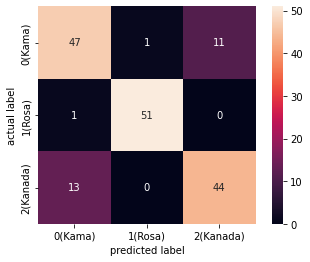

In [49]:
cm = confusion_matrix(training_labels, predictions_on_train)

sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True,
                        xticklabels=['0(Kama)', '1(Rosa)', '2(Kanada)'],
                        yticklabels=['0(Kama)', '1(Rosa)', '2(Kanada)'])
plt.ylabel('actual label')
plt.xlabel('predicted label');

In [50]:
from sklearn.metrics import accuracy_score

accuracy_score(training_labels, predictions_on_train)

0.8452380952380952

In [51]:
from sklearn.metrics import classification_report

print(classification_report(training_labels, predictions_on_train))

              precision    recall  f1-score   support

           1       0.77      0.80      0.78        59
           2       0.98      0.98      0.98        52
           3       0.80      0.77      0.79        57

    accuracy                           0.85       168
   macro avg       0.85      0.85      0.85       168
weighted avg       0.85      0.85      0.85       168



#### Support Vector Classifier

In [52]:
predictions_on_train_svc = cross_val_predict(lin_svc, training_final, training_labels, cv=10)

In [53]:
confusion_matrix(training_labels, predictions_on_train_svc)

array([[46,  2, 11],
       [ 0, 51,  1],
       [12,  1, 44]], dtype=int64)

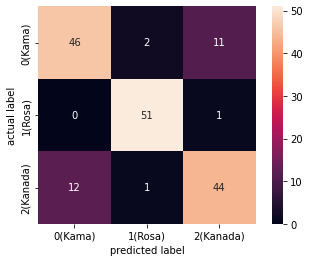

In [54]:
cm = confusion_matrix(training_labels, predictions_on_train_svc)

sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True,
                        xticklabels=['0(Kama)', '1(Rosa)', '2(Kanada)'],
                        yticklabels=['0(Kama)', '1(Rosa)', '2(Kanada)'])
plt.ylabel('actual label')
plt.xlabel('predicted label');

In [55]:
from sklearn.metrics import accuracy_score

accuracy_score(training_labels, predictions_on_train_svc)

0.8392857142857143

In [56]:
from sklearn.metrics import classification_report

print(classification_report(training_labels, predictions_on_train_svc))

              precision    recall  f1-score   support

           1       0.79      0.78      0.79        59
           2       0.94      0.98      0.96        52
           3       0.79      0.77      0.78        57

    accuracy                           0.84       168
   macro avg       0.84      0.84      0.84       168
weighted avg       0.84      0.84      0.84       168



<a name='7'></a>

# 7. Evaluating the Model on the Test Set

In [160]:
seeds_test.head()

,Asymmetry coefficient,Length of kernel groove,Class
134,4.972,5.847,2
5,2.462,4.956,1
13,3.136,4.872,1
46,1.367,5.132,1
62,3.220,4.605,1


In [159]:
seeds_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 134 to 183
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Asymmetry coefficient    42 non-null     float64
 1   Length of kernel groove  42 non-null     float64
 2   Class                    42 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 1.3 KB


In [60]:
X_test = seeds_test.drop('Class', axis=1)
y_test = seeds_test['Class']

X_test_prepared = scaler.transform(X_test)

In [170]:
X_test_prepared.mean()

0.46028073044755063

#### Log Model Testing

In [138]:
log_t = log_model.score(X_test_prepared, y_test)

In [139]:
log_t

0.9523809523809523

#### SGD Testing

In [140]:
sgd_t = sgd_clf.score(X_test_prepared, y_test)

In [141]:
sgd_t

0.9047619047619048

#### Decission Tree Testing

In [142]:
tree_t = tree_clf.score(X_test_prepared, y_test)

In [143]:
tree_t

0.9285714285714286

#### SVC Testing

In [144]:
svc_t = lin_svc.score(X_test_prepared, y_test)

In [145]:
svc_t

0.9523809523809523

#### Random Forest Testing

In [153]:
rfc_t = forest_clf.score(X_test_prepared,y_test)

In [154]:
rfc_t

0.9047619047619048

---

In [156]:
con = pd.DataFrame({'log_model':[log1,log2,log_t],
                    'sgd_clf':[sgd1,sgd2,sgd_t],
                    'tree_clf':[tree1,tree2,tree_t],
                    'lin_svc':[svc1,svc2,svc_t],
                    'forest_clf':[rfc1,rfc2,rfc_t]},
                   index=['train_acc','train_eval','test_eval'])

con

,log_model,sgd_clf,tree_clf,lin_svc,forest_clf
train_acc,0.833333,0.839286,1.000000,0.845238,1.000000
train_eval,0.844485,0.803309,0.766912,0.838603,0.808824
test_eval,0.952381,0.904762,0.928571,0.952381,0.904762


#### Kesimpulan:

Setelah melalui tahap klasifikasi dengan 5 model yaitu Linear Classifier, SGD, Decission Tree, Support Vector Classifier, dan Random Forest didapati hasil seperti dataframe diatas. Berdasarkan hasil tersebut, akurasi tertinggi ada pada Decission Tree dan Random Forest namun sudah dipastikan itu merupakan overfit. Hasil testing evaluation juga yang tertinggi adalah log_model dan lin_svc. Akurasi yang kami tetapkan untuk digunakan pada confussion metrics adalah log_model dan lin_svc, sehingga kami mendapati bahwa log_model merupakan yang terbaik.